## Prueba 2 - Validación de Independencia
#### Realice un programa que permita validara la independencia de datos y generar una grafica de pie que represente el total de 0 y 1 generados, además del numero de corridas generados por los métodos de cuadrados medios, productos medios y random para validar la Hipótesis.

In [86]:
#>= 0.5 == 1
import math
import random
import matplotlib.pyplot as plt
import numpy as np

#### Funciones para la generacion de numeros pseudoaleatorios

In [88]:
def cuadrados_medios(xo, d):
    vector_final = []
    xn = xo
    #print("It. \t Xn \t Ui \t Rn")
    
    for i in range(100):
        xnn = xn**2
        txnn = str(xnn).zfill(8)
        tam = len(txnn)
        ui = int(txnn[int(tam/2-d/2):int(tam/2+d/2)])
        rn = ui / (int('9'*d)+1)
        #print(str(i) + "\t" + str(xn) + "\t"+ str(ui)+"\t"+str(rn))
        xn = ui
        vector_final.append(rn)

    return vector_final

def congruencia_lineal(a, b, xo, m):
    vector_final = []
    xn = xo
    #print("It. \t Xn \t Ui")

    for i in range(100):
        xnn = (a*xn+b) % m
        ui = xnn/m
        #print(str(i) + "\t"+ str(xnn)+"\t"+str(ui))
        xn = xnn
        vector_final.append(ui)

    return vector_final

def python_random():
    vector_final = []
    random.seed(1032022)
    [vector_final.append(random.random())for i in range(100)]
    
    return vector_final

def tausworthe(q, r, l):
    vector_inicial = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    #print('Primeros bits: ',vector_inicial)

    ##Valor de la cantidad de bits a generar, puede cambiar
    generar = 100
    vector_total = vector_inicial

    for i in range(q+1, (l * generar)+1):
        if vector_inicial[(i-r)-1] == vector_inicial[(i-q)-1]:
            vector_total.append(0)
        else:
            vector_total.append(1)

    #print('Total de bits según la cantidad: ', vector_total)

    vector_separados = []

    for i in range(0, len(vector_total), l):
        vector_separados.append(vector_total[i:i + l])

    #print('Bits separados según el valor de l: ', vector_separados)

    vector_decimales = []

    for i in vector_separados:
        numero_bin = ("").join(str(e) for e in i)
        vector_decimales.append(int(numero_bin, 2))

    #print('Vector de decimales (bits convertidos): ', vector_decimales)

    vector_final = []

    for i in vector_decimales:
        vector_final.append(i/2**l)

    #print('Resultados: ', vector_final)

    return vector_final

#### Funciones para calculos de Validacion de Independencia

In [89]:
def secuencia_1_0(vector_final):
    vector_secuencia = []

    for i in vector_final:
        if (i >= 0.5):
            vector_secuencia.append(1)
        else:
            vector_secuencia.append(0)

    return vector_secuencia

def datos_secuencia(vector_secuencia):
    corrida = 1
    n0 = 0
    n1 = 0

    try:
        for i in range(len(vector_secuencia)):

            if (vector_secuencia[i] == 1):
                n1 += 1
            
            elif (vector_secuencia[i] == 0):
                n0 += 1

            if (vector_secuencia[i] != vector_secuencia[i+1]):
                corrida += 1


    except:
        print('Aqui acaba el bucle.')

    return corrida, n0, n1

def valores_comprobacion(n0, n1, co):
    n = n0 + n1

    valor_esperado = ((2*n0*n1)/n)+(1/2)
    varianza = ((2*n0*n1)*(2*n0*n1-n))/(n^2*(n-1))
    estadistico = (co - valor_esperado)/math.sqrt(varianza)

    comprobar = 1.96

    if ((estadistico >= -comprobar) & (estadistico <= comprobar)):
        print('El valor ', estadistico, ' cae dentro del intervalo')
    else:
        print('El valor ', estadistico, ' no cae dentro del intervalo')

def grafica_pie_sencuencia(datos):

    plt.figure()
    
    nombres = ['Unos', 'Ceros']
    data = [datos[2], datos[1]] 

    plt.pie(data, labels=nombres, autopct="%0.1f %%")
    plt.axis("equal")
    plt.show()



#### Ejecucion Cuadrados Medios

Aqui acaba el bucle.
Datos de la secuencia
Corrida:  49
Ceros:  41
Unos:  59
Validacion de Independencia
El valor  0.0003190129352819716  cae dentro del intervalo
Grafica de Datos


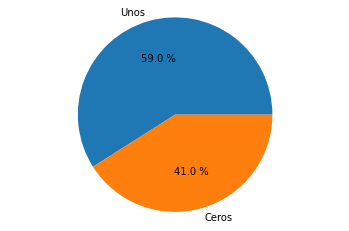

In [90]:
vector_cuadrados_medios = cuadrados_medios(74731897457, 7)

#print('Numeros pseudoalatorios generados')
print(vector_cuadrados_medios)

secuencia_cuadrados_medios = secuencia_1_0(vector_cuadrados_medios)
#print('Secuencia de 1 y 0')
#print(secuencia_cuadrados_medios)

valores_secuencia_cuadrados_medios = datos_secuencia(secuencia_cuadrados_medios)

print('Datos de la secuencia')
#print(valores_secuencia)
print('Corrida: ', valores_secuencia_cuadrados_medios[0])
print('Ceros: ', valores_secuencia_cuadrados_medios[1])
print('Unos: ', valores_secuencia_cuadrados_medios[2])

print('Validacion de Independencia')
valores_comprobacion(valores_secuencia_cuadrados_medios[1], valores_secuencia_cuadrados_medios[2], valores_secuencia_cuadrados_medios[0])

print('Grafica de Datos')
grafica_pie_sencuencia(valores_secuencia_cuadrados_medios)


#### Ejecucion Congruencia Lineal

Aqui acaba el bucle.
Datos de la secuencia
Corrida:  45
Ceros:  44
Unos:  56
Validacion de Independencia
El valor  -0.012472870795889806  cae dentro del intervalo
Grafica de Datos


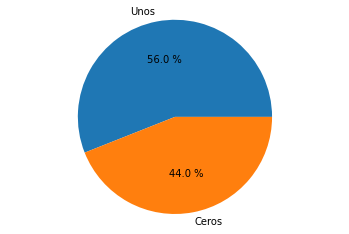

In [91]:
vector_congruencia_lineal = congruencia_lineal(74731897457, 37747318974, 7, 19)

#print('Numeros pseudoalatorios generados')
print(vector_congruencia_lineal)

secuencia_congruencia_lineal = secuencia_1_0(vector_congruencia_lineal)
#print('Secuencia de 1 y 0')
#print(secuencia_congruencia_lineal)

valores_secuencia_congruencia_lineal = datos_secuencia(secuencia_congruencia_lineal)

print('Datos de la secuencia')
#print(valores_secuencia)
print('Corrida: ', valores_secuencia_congruencia_lineal[0])
print('Ceros: ', valores_secuencia_congruencia_lineal[1])
print('Unos: ', valores_secuencia_congruencia_lineal[2])

print('Validacion de Independencia')
valores_comprobacion(valores_secuencia_congruencia_lineal[1], valores_secuencia_congruencia_lineal[2], valores_secuencia_congruencia_lineal[0])

print('Grafica de Datos')
grafica_pie_sencuencia(valores_secuencia_congruencia_lineal)

#### Ejecucion Random Python

Aqui acaba el bucle.
Datos de la secuencia
Corrida:  46
Ceros:  57
Unos:  43
Validacion de Independencia
El valor  -0.009234267251422732  cae dentro del intervalo
Grafica de Datos


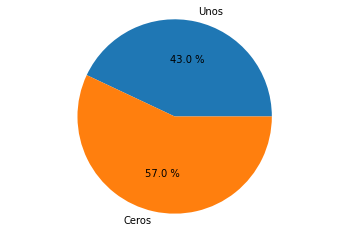

In [92]:
vector_random = python_random()

#print('Numeros pseudoalatorios generados')
#print(vector_random)

secuencia_random = secuencia_1_0(vector_random)
#print('Secuencia de 1 y 0')
#print(secuencia_random)

valores_secuencia_random = datos_secuencia(secuencia_random)

print('Datos de la secuencia')
#print(valores_secuencia)
print('Corrida: ', valores_secuencia_random[0])
print('Ceros: ', valores_secuencia_random[1])
print('Unos: ', valores_secuencia_random[2])

print('Validacion de Independencia')
valores_comprobacion(valores_secuencia_random[1], valores_secuencia_random[2], valores_secuencia_random[0])

print('Grafica de Datos')
grafica_pie_sencuencia(valores_secuencia_random)



#### Ejecucion Tausworthe

Aqui acaba el bucle.
Datos de la secuencia
Corrida:  48
Ceros:  42
Unos:  58
Validacion de Independencia
El valor  -0.003220427159667197  cae dentro del intervalo
Grafica de Datos


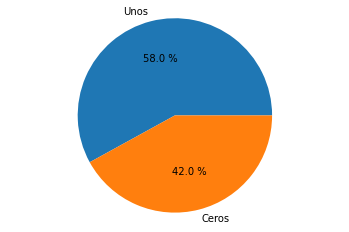

In [78]:
vector_tausworthe = tausworthe(15, 7, 7)

#print('Numeros pseudoalatorios generados')
#print(vector_tausworthe)

secuencia_tausworthe = secuencia_1_0(vector_tausworthe)
#print('Secuencia de 1 y 0')
#print(secuencia_tausworthe)

valores_secuencia_tausworthe = datos_secuencia(secuencia_tausworthe)

print('Datos de la secuencia')
#print(valores_secuencia)
print('Corrida: ', valores_secuencia_tausworthe[0])
print('Ceros: ', valores_secuencia_tausworthe[1])
print('Unos: ', valores_secuencia_tausworthe[2])

print('Validacion de Independencia')
valores_comprobacion(valores_secuencia_tausworthe[1], valores_secuencia_tausworthe[2], valores_secuencia_tausworthe[0])

print('Grafica de Datos')
grafica_pie_sencuencia(valores_secuencia_tausworthe)

#### Grafica de corridas por generador

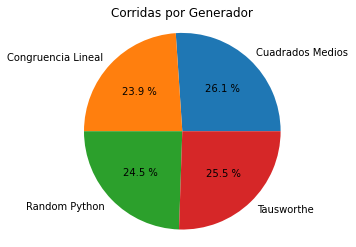

In [93]:
plt.figure()
plt.title('Corridas por Generador')    


nombres = ['Cuadrados Medios', 'Congruencia Lineal', 'Random Python', 'Tausworthe']
data = [valores_secuencia_cuadrados_medios[0], valores_secuencia_congruencia_lineal[0], valores_secuencia_random[0], valores_secuencia_tausworthe[0]] 

plt.pie(data, labels=nombres, autopct="%0.1f %%")
plt.axis("equal")
plt.show()